# ****DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS****

## I**mport Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Raw Data**

In [8]:
df = pd.read_csv("C:/Users/prabu/OneDrive/Desktop/DATA ANALYST/PROJECTS/PYTHON/BLINKIT ANALYSIS/BlinkIT Grocery Data.xlsx - BlinkIT Grocery Data.csv")

In [12]:
df.tail(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8503,Regular,FDR22,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.018473,NaN,109.9544,4.0
8504,Regular,FDS09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.080696,NaN,51.3008,4.0
8505,Regular,FDS34,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.076387,NaN,112.1518,4.0
8506,Regular,FDU09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.066275,NaN,54.1956,4.0
8507,Regular,FDU33,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.134057,NaN,45.3402,4.0
8508,Regular,FDU57,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.089121,NaN,149.8708,4.0
8509,Regular,FDU58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.028871,NaN,188.7898,4.0
8510,Regular,FDX46,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.057835,NaN,57.5562,4.0
8511,Regular,FDX57,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.047037,NaN,96.4068,4.0
8512,Regular,FDY33,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.096730,NaN,159.0262,4.0


## **Size of Data**

In [18]:
print("Size of Data :",df.shape)

Size of Data : (8523, 12)


 ## **Field Info**

In [25]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

 ## **Data Types**

In [27]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

 ## **Data Cleaning**

In [34]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [36]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF' : 'Low Fat',
                                                          'low fat' : 'Low Fat',
                                                          'reg' : 'Regular'})
                                                          

In [38]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


 ## **Business Requirements**

 ### **KPI Requirements**

In [53]:
# Total Sales 
total_sales = df['Sales'].sum()

# Average Sales 
avg_sales = df['Sales'].mean()

# No of Items Sold
no_of_items_sold = df['Sales'].count()

# Average Ratings 
avg_ratings = df['Rating'].mean()

# Display
print(f"Total Sales : ${total_sales:,.1f}")

print(f"Average Sales : ${avg_sales:,.1f}")

print(f"No of Items Sold : {no_of_items_sold:,.0f}")

print(f"Avearge Ratings : {avg_ratings:,.1f}")


Total Sales : $1,201,681.5
Average Sales : $141.0
No of Items Sold : 8,523
Avearge Ratings : 4.0


 ## **Chart Requirements**

 ### **Total Sales by Fat Content**

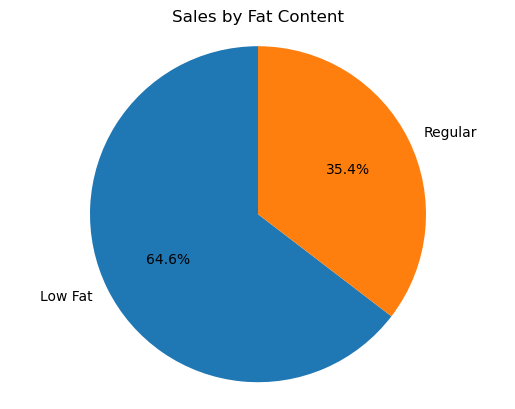

In [67]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat , labels = sales_by_fat.index, 
        autopct = '%.1f%%', startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

 ### **Total Sales by Item Types**

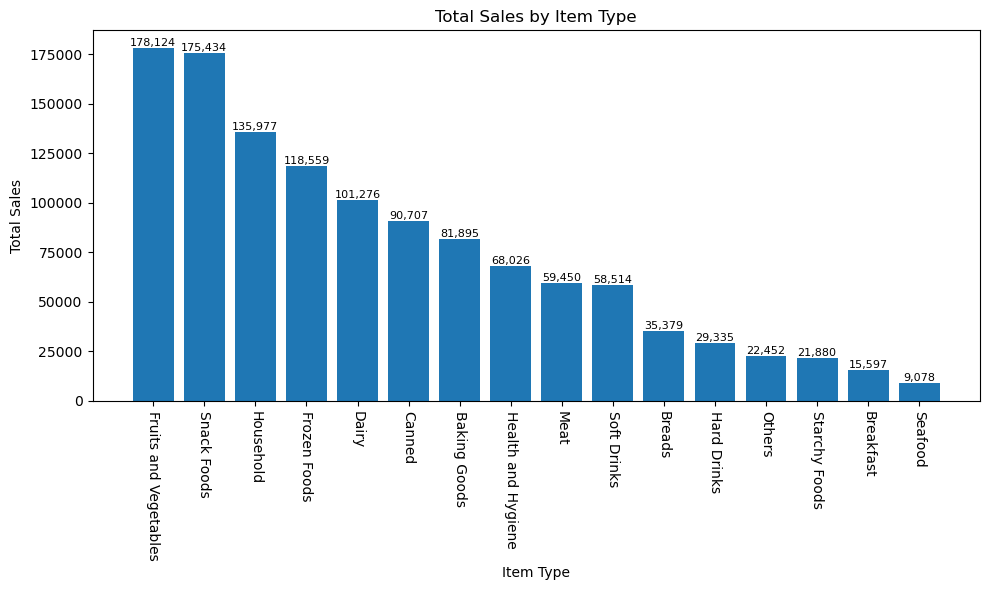

In [83]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize = (10,6))
bars = plt.bar( sales_by_item_type.index,sales_by_item_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height(),
             f'{bar.get_height() :,.0f}', ha='center',va='bottom',fontsize =8)

plt.tight_layout()
plt.show()

 ### **Fat Content by Outlet for Total Sales**

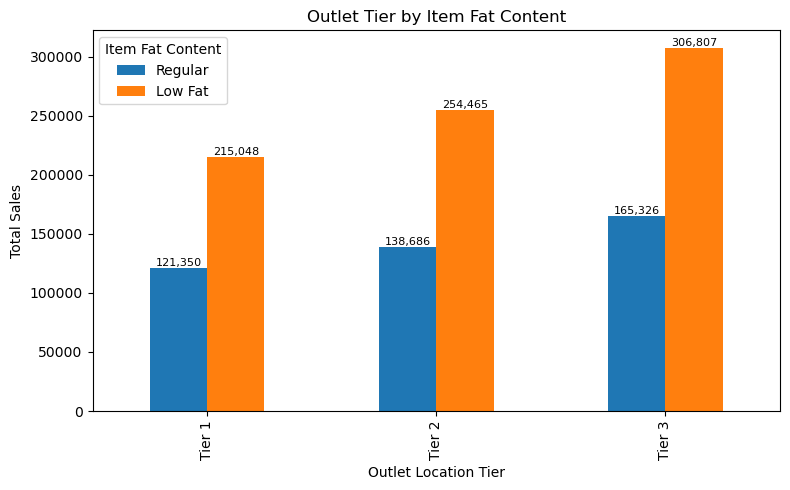

In [93]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')

# Annotate each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


 ### **Total Sales by Outlet Establishment**

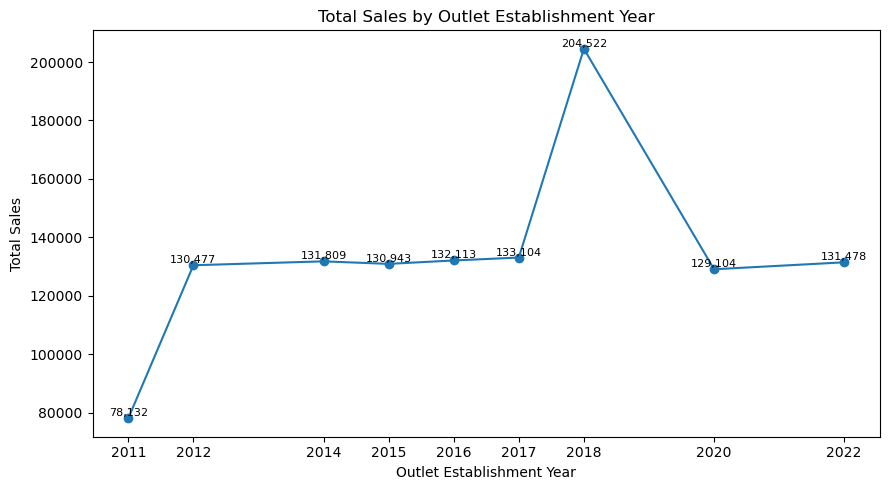

In [116]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Add text labels on each point
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.xticks(sales_by_year.index.astype(int))  # Make sure full years are shown
plt.tight_layout()
plt.show()




 ### **Sales by Outlet Size**

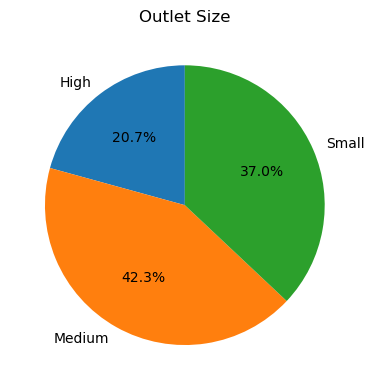

In [131]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_outlet_size, labels=sales_by_outlet_size.index , autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

 ### **Sales by Outlet Location**

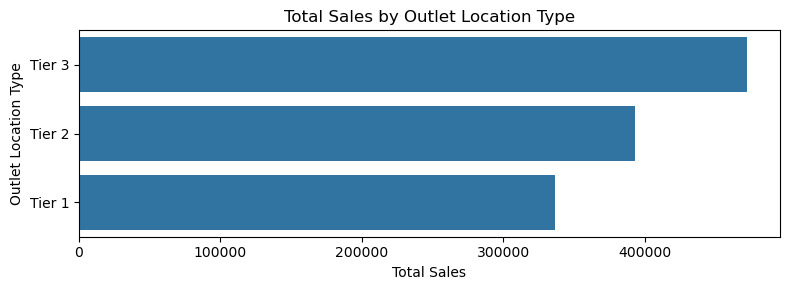

In [143]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()  # Ensure layout fits without scroll
plt.show()